# Sklearn

# Визуализация данных

In [1]:
from sklearn import datasets

import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### Загрузка выборки

In [4]:
digits  =  datasets.load_digits()

In [5]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [6]:
print('target:', digits.target[0])
print('features: \n', digits.data[0]) 
print('number of features:', len(digits.data[0]))

target: 0
features: 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
number of features: 64


## Визуализация объектов выборки

TypeError: Invalid shape (64,) for image data

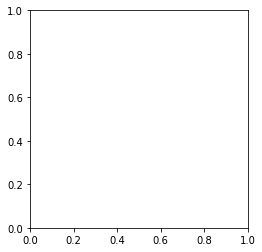

In [8]:
#не будет работать: Invalid dimensions for image data
plt.imshow(digits.data[0])

In [9]:
digits.data[0].shape

(64,)

In [10]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits.data[0].reshape(8,8).shape

(8, 8)

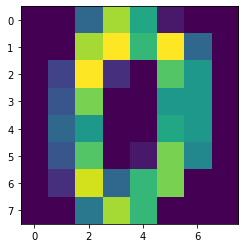

In [13]:
plt.imshow(digits.data[0].reshape(8,8));

In [14]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [15]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

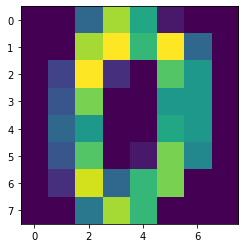

In [16]:
plt.imshow(digits.images[0]);

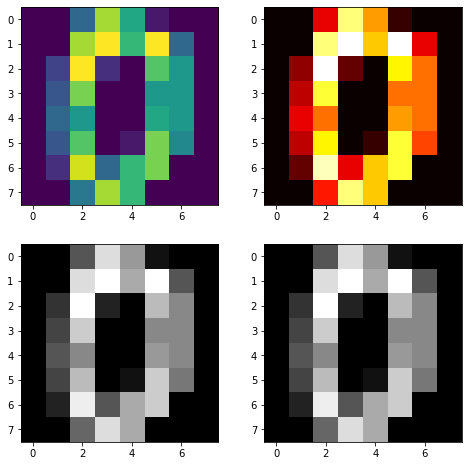

In [18]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.imshow(digits.images[0])

plt.subplot(2, 2, 2)
plt.imshow(digits.images[0], cmap = 'hot')

plt.subplot(2, 2, 3)
plt.imshow(digits.images[0], cmap = 'gray')

plt.subplot(2, 2, 4)
plt.imshow(digits.images[0], cmap = 'gray', interpolation = 'nearest');

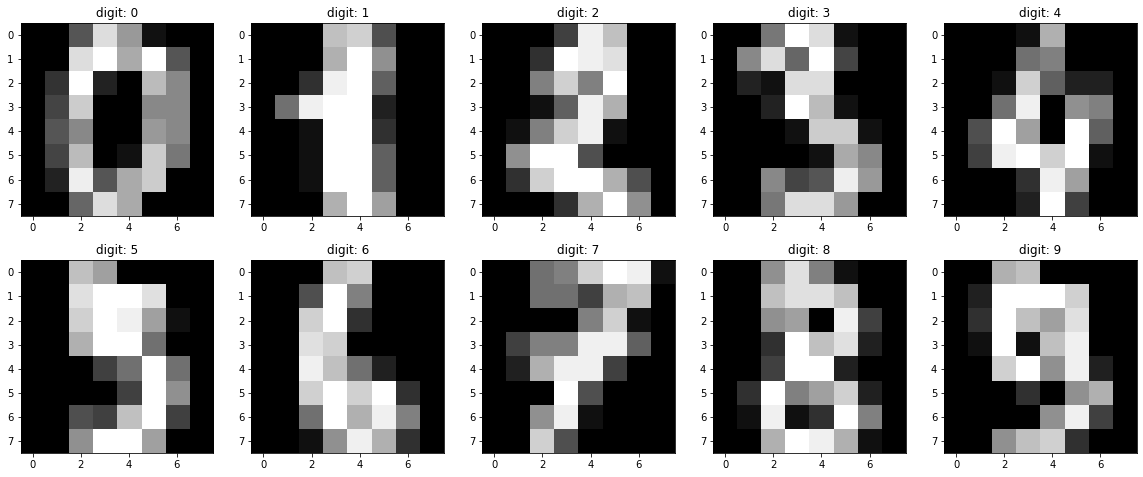

In [19]:
plt.figure(figsize=(20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'gray')
    plt.title('digit: ' + str(digits.target[plot_number]))

## Уменьшение размерности

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from collections import Counter

In [21]:
data = digits.data[:1000]
labels = digits.target[:1000]

In [22]:
Counter(labels)

Counter({0: 99,
         1: 102,
         2: 100,
         3: 104,
         4: 98,
         5: 100,
         6: 101,
         7: 99,
         8: 98,
         9: 99})

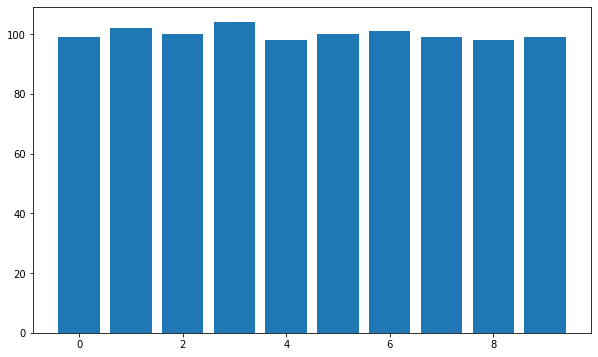

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(Counter(labels).keys(), Counter(labels).values());

In [24]:
classifier = KNeighborsClassifier()

In [25]:
classifier.fit(data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
print(classification_report(classifier.predict(data), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.97      0.99       105
           2       1.00      1.00      1.00       100
           3       1.00      0.98      0.99       106
           4       1.00      1.00      1.00        98
           5       0.99      1.00      0.99        99
           6       1.00      1.00      1.00       101
           7       0.99      0.99      0.99        99
           8       0.97      0.99      0.98        96
           9       0.96      0.98      0.97        97

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Random projection

In [28]:
from sklearn import random_projection

In [29]:
projection = random_projection.SparseRandomProjection(n_components=2, random_state=0)
data_2d_rp = projection.fit_transform(data)

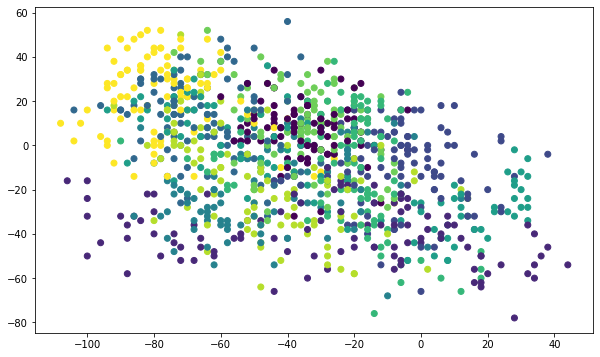

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_rp[:, 0], data_2d_rp[:, 1], c=labels);

In [31]:
classifier.fit(data_2d_rp, labels)
print(classification_report(classifier.predict(data_2d_rp), labels))

              precision    recall  f1-score   support

           0       0.74      0.47      0.58       154
           1       0.75      0.58      0.65       131
           2       0.67      0.59      0.63       113
           3       0.71      0.51      0.60       144
           4       0.38      0.56      0.45        66
           5       0.42      0.53      0.47        79
           6       0.52      0.57      0.55        93
           7       0.35      0.51      0.42        69
           8       0.37      0.58      0.45        62
           9       0.62      0.69      0.65        89

    accuracy                           0.55      1000
   macro avg       0.55      0.56      0.54      1000
weighted avg       0.60      0.55      0.56      1000



### PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2, random_state=0)
data_2d_pca = pca.fit_transform(data);

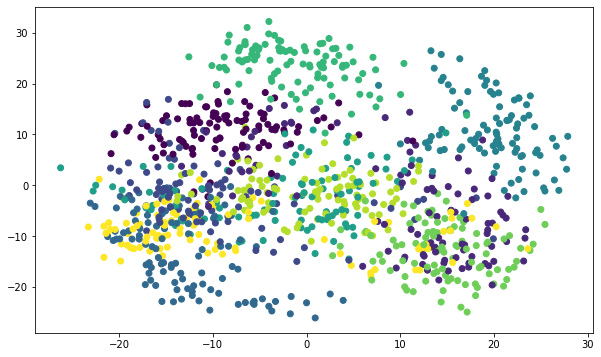

In [34]:
plt.figure(figsize = (10, 6))
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=labels);

In [35]:
classifier.fit(data_2d_pca, labels)
print(classification_report(classifier.predict(data_2d_pca), labels))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       113
           1       0.56      0.54      0.55       105
           2       0.59      0.57      0.58       104
           3       0.77      0.79      0.78       101
           4       0.95      0.93      0.94       100
           5       0.56      0.54      0.55       104
           6       0.92      0.93      0.93       100
           7       0.76      0.71      0.74       105
           8       0.62      0.66      0.64        92
           9       0.52      0.67      0.58        76

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



### MDS

In [36]:
from sklearn import manifold

In [37]:
mds = manifold.MDS(n_components=2, n_init=1, max_iter=100)
data_2d_mds = mds.fit_transform(data)

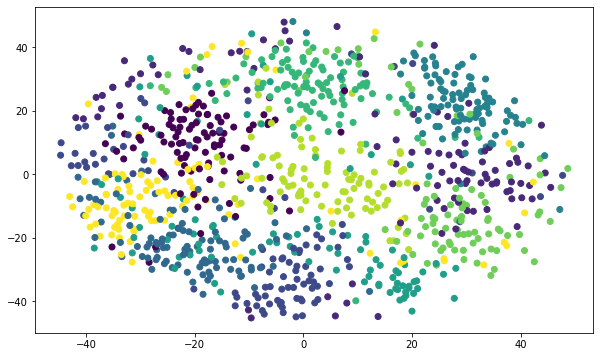

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c=labels);

In [39]:
classifier.fit(data_2d_mds, labels)
print(classification_report(classifier.predict(data_2d_mds), labels))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       115
           1       0.68      0.63      0.65       109
           2       0.72      0.75      0.73        96
           3       0.70      0.69      0.70       106
           4       0.92      0.80      0.86       112
           5       0.45      0.68      0.54        66
           6       0.88      0.75      0.81       119
           7       0.66      0.73      0.69        89
           8       0.79      0.75      0.77       103
           9       0.54      0.62      0.58        85

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.73      0.71      0.72      1000



### t- SNE

In [40]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
data_2d_tsne = tsne.fit_transform(data)

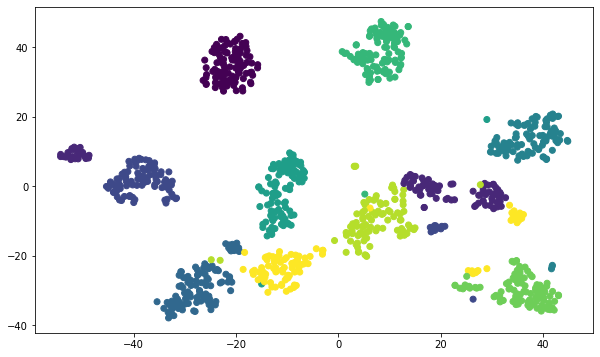

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c=labels);

In [42]:
classifier.fit(data_2d_tsne, labels)
print(classification_report(classifier.predict(data_2d_tsne), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      0.98      0.99       104
           2       0.99      1.00      0.99        99
           3       1.00      0.97      0.99       107
           4       1.00      0.99      0.99        99
           5       0.98      1.00      0.99        98
           6       0.99      1.00      1.00       100
           7       0.99      0.99      0.99        99
           8       0.96      0.98      0.97        96
           9       0.98      0.98      0.98        99

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

